In [1]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', 200)  # Adjust the width as needed
import faiss

In [2]:
topics = {
    "Soccer World Cup 2020": [
        "The 2020 FIFA World Cup, a globally anticipated event, brought together nations from around the world.",
        "Hosted in multiple cities, the 2020 Soccer World Cup was a month-long celebration of the beautiful game.",
        "It featured the world's top soccer teams, each vying for the coveted championship title in the Soccer World Cup.",
        "With palpable anticipation, fans from diverse backgrounds united to support their respective nations in the Soccer World Cup.",
        "The matches were held in state-of-the-art stadiums, showcasing the pinnacle of soccer infrastructure in the Soccer World Cup.",
        "Talented soccer players displayed their skills on the field during the Soccer World Cup.",
        "The tournament was not just a competition but also a cultural exchange where fans shared traditions, music, and their passion for the Soccer World Cup.",
        "The tournament saw nail-biting moments, penalty shootouts, and thrilling comebacks, making the Soccer World Cup unforgettable.",
        "In the end, the 2020 Soccer World Cup reached its pinnacle as two teams faced off, and a nation's pride was at stake.",
        "The Soccer World Cup left an indelible mark on the hearts of fans worldwide, reminding us of the power of sports to unite and inspire."
    ],
    "Kids' Behavior at Home": [
        "Children's behavior at home is a dynamic aspect of family life, where kids often display boundless energy and curiosity.",
        "At a young age, kids are full of energy, exploring their surroundings, asking countless questions, and learning through play at home.",
        "Parents and caregivers play a crucial role in shaping kids' behavior, providing guidance and setting boundaries within the home.",
        "Kids may display a wide range of emotions at home, from joy and laughter to frustration and tears.",
        "Positive reinforcement and communication with parents nurture emotional development in kids at home.",
        "Routine and structure are essential for kids' well-being in their home environment.",
        "Consistent meal times, bedtime routines, and designated play and study hours create a sense of security at home.",
        "Setting rules and consequences helps children understand boundaries and responsibilities within the home.",
        "Engaging activities like reading books, doing art projects, and exploring nature foster creativity and learning in kids at home.",
        "As children grow, they develop a sense of independence and may test boundaries, requiring a balanced approach from parents within the home."
    ],
    "Nobel Prize 2020": [
        "The Nobel Prize, one of the world's most prestigious awards, recognized exceptional achievements across multiple fields in 2020.",
        "Celebrating the brilliant minds that expanded knowledge, the Nobel Prize acknowledged outstanding contributions in various areas.",
        "In 2020, the Nobel Prize awarded laureates in Physics, Chemistry, Medicine, Literature, and Peace for their remarkable accomplishments.",
        "The Nobel Prize in Physics was awarded for groundbreaking work in understanding the universe, including the discovery of black holes.",
        "Chemistry laureates were acknowledged for innovations that have practical applications in various industries.",
        "The Nobel Prize in Physiology or Medicine highlighted advancements in medical research and treatments.",
        "Recognizing exceptional literary works, the Nobel Prize in Literature stirred emotions and enriched our cultural heritage.",
        "The Nobel Peace Prize, awarded to individuals or organizations, made significant contributions to peace and conflict resolution.",
        "The Nobel Prize in 2020 celebrated accomplishments and served as a reminder of the potential for positive change and innovation across the world."
    ],
    "Keeping Pets at Home": [
        "Keeping pets at home is a rewarding and fulfilling experience, where pets, whether dogs, cats, birds, or reptiles, become beloved members of the family.",
        "They offer companionship, unconditional love, and a unique bond that enriches the lives of those who open their homes to pets.",
        "Dogs, known for loyalty, provide affection, protection, and endless joy, making them cherished members of many households.",
        "Cats, independent and graceful, bring tranquility and comfort to homes with their purring and soft fur.",
        "Birds, with their colorful plumage and melodious songs, add a touch of nature and serenity to the home environment.",
        "Fish, residing in aquariums, offer a visually appealing and serene element that captivates observers.",
        "Reptiles, such as turtles and lizards, are fascinating creatures requiring specialized care, making them intriguing pets for enthusiasts.",
        "Responsible pet ownership involves providing proper nutrition, veterinary care, and a safe environment within the home.",
        "In return, pets reciprocate with affection and become cherished companions within their respective homes.",
        "The bond between pets and their human families is a source of immense happiness in homes worldwide."
    ],
    "Climbing Mount Everest": [
        "Climbing Mount Everest is a formidable and life-changing endeavor, where adventurers and mountaineers pursue the dream and challenge of scaling the world's highest peak.",
        "Everest's summit, standing at an elevation of 29,032 feet (8,849 meters), is an iconic symbol of determination, courage, and exploration.",
        "The journey to Mount Everest's summit begins with meticulous planning, physical training, and the acquisition of necessary climbing skills.",
        "Climbers embark on a treacherous expedition, navigating through perilous icefalls, enduring extreme temperatures, and battling high-altitude conditions.",
        "Base camps along the route provide temporary respite and acclimatization for climbers as they make their ascent.",
        "Reaching the summit of Mount Everest represents a momentous achievement and the realization of a lifelong dream for many climbers.",
        "From the peak, climbers are greeted with breathtaking panoramic views of the world below, a reward for their determination and perseverance.",
        "However, Mount Everest is unforgiving, and many climbers have lost their lives attempting the ascent, underscoring the mountain's challenges.",
        "Climbing Mount Everest is not just a physical feat but a test of mental fortitude and perseverance, showcasing the human spirit's capacity to conquer the impossible.",
        "Both literally and metaphorically, climbing Mount Everest represents a journey that reaches new heights."
    ]
}


In [3]:
data=[]
for topic, sentences in topics.items():
    for sentence in sentences:
        data.append({"Topic": topic, "Sentence": sentence})

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(data)

In [4]:
df.head(2)

,Topic,Sentence
0,Soccer World Cup 2020,"The 2020 FIFA World Cup, a globally anticipated event, brought together nations from around the world."
1,Soccer World Cup 2020,"Hosted in multiple cities, the 2020 Soccer World Cup was a month-long celebration of the beautiful game."


In [5]:
df=df.reset_index()

In [6]:
df.shape

(49, 3)

In [7]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-mean-tokens')


#model = SentenceTransformer('all-MiniLM-L6-v2') # it gives lower dimension 386


In [8]:
sentences = list(df['Sentence'])

In [9]:
sentence_embeddings = model.encode(sentences)


In [10]:
sentence_embeddings.shape

(49, 768)

In [11]:
len(sentence_embeddings)

49

In [12]:
df['embedding'] = df['Sentence'].map(lambda x: model.encode(x))

In [13]:
len(df['embedding'].iloc[0])

768

In [14]:
df.head(2)

,index,Topic,Sentence,embedding
0,0,Soccer World Cup 2020,"The 2020 FIFA World Cup, a globally anticipated event, brought together nations from around the world.","[-0.42515686, -0.17480914, 1.8467963, 0.15087691, -0.009726069, -1.5424263, -0.6151803, 0.14795646, 0.2542171, -1.0142606, 0.27748397, -0.29301974, 0.15616056, 1.4512328, 1.20133, 0.12567022, 0.04..."
1,1,Soccer World Cup 2020,"Hosted in multiple cities, the 2020 Soccer World Cup was a month-long celebration of the beautiful game.","[-0.87892085, -0.20032081, 1.4006628, 0.29781196, 0.30973944, -1.5553259, -0.3482714, 0.84209317, 0.018096512, -0.5282332, 0.15362588, -1.0313705, 0.62738407, 0.63816476, 0.55353403, 0.25887442, 0..."


In [15]:
embedding_dimension = sentence_embeddings.shape[1]

In [16]:
index=faiss.IndexFlatL2(embedding_dimension)

In [17]:
index.ntotal, index.is_trained

(0, True)

In [18]:
## now adding embedding vector in sentence embeddings

In [19]:
index.add(sentence_embeddings)

In [20]:
index.ntotal

49

In [21]:
k=3

In [22]:
#xq=model.encode(['would like to know about 2020 FIFA world cup Soccer'])

xq=model.encode(['would like to know about Nobel Prize 2020'])


In [23]:
xq

array([[-3.81701648e-01, -4.04578060e-01,  1.21103776e+00,
         9.71325189e-02,  5.77969253e-01, -8.08756828e-01,
        -9.37761903e-01, -3.65120709e-01,  7.37179637e-01,
        -8.85952175e-01, -6.08786121e-02,  7.51918197e-01,
         3.61013353e-01,  1.18043625e+00,  1.21623158e-01,
        -1.67164236e-01, -5.13558924e-01, -6.40886948e-02,
         6.32150322e-02, -4.21555609e-01,  3.80068958e-01,
         4.31368828e-01,  6.15519993e-02, -2.81333268e-01,
         1.06764960e+00, -5.32801270e-01, -3.87867153e-01,
        -3.97076905e-01,  3.80420506e-01,  5.66727161e-01,
        -3.47353518e-01,  7.94552922e-01, -1.02567625e+00,
        -1.56264096e-01, -1.27178025e+00,  5.37283182e-01,
        -6.65345322e-03,  1.42730623e-01,  1.68421462e-01,
         7.30923772e-01,  4.42011505e-02, -5.56821108e-01,
        -1.17749617e-01,  4.82681513e-01, -1.55967593e+00,
        -1.27712309e+00, -3.74664962e-01, -5.83819747e-01,
        -8.42892304e-02, -1.50736117e+00, -4.15233850e-0

In [24]:
%%time
D, I = index.search(xq, k)  # search
print(I)

[[20 28 22]]
CPU times: total: 0 ns
Wall time: 1.01 ms


In [25]:
df.iloc[[20, 28, 22]]

,index,Topic,Sentence,embedding
20,20,Nobel Prize 2020,"The Nobel Prize, one of the world's most prestigious awards, recognized exceptional achievements across multiple fields in 2020.","[-0.7098484, 0.11139103, 0.9141327, 0.2170723, 0.6606698, -1.3217964, 0.15830079, 0.32073772, 0.5343096, -1.2622905, -0.12365559, 0.36141455, 0.71983576, 0.9434296, 0.4363507, -0.22192915, 0.36854..."
28,28,Nobel Prize 2020,The Nobel Prize in 2020 celebrated accomplishments and served as a reminder of the potential for positive change and innovation across the world.,"[-0.39877388, 0.13049346, 1.7794923, -0.1949765, 0.32871997, -1.3289046, -0.18987823, 0.015368937, 0.6483368, -0.9373034, 0.23878448, 0.3269869, 0.624989, 0.86078733, 0.2896345, -0.6804257, -0.110..."
22,22,Nobel Prize 2020,"In 2020, the Nobel Prize awarded laureates in Physics, Chemistry, Medicine, Literature, and Peace for their remarkable accomplishments.","[-0.7103145, 0.8782501, 1.118884, -0.2171279, 0.64112484, -1.0415105, 0.29237664, -0.3109003, 0.6889572, -0.88039505, -0.021695022, 0.21332428, 0.7415612, 1.4984628, 0.15303433, 0.12411607, -0.105..."


In [26]:
from scipy.spatial.distance import euclidean


In [27]:
# IndexFlatL2 -> Flat index with L2 distance (Eculidian distance)
# IndexFlatIP -> Flat index with IP (Inner Product)

In [28]:
### Euclidian distance

In [29]:
distance=[]

for sub_array in sentence_embeddings:
    distance.append(euclidean(sub_array, xq[0]))

In [30]:
index

<faiss.swigfaiss.IndexFlatL2; proxy of <Swig Object of type 'faiss::IndexFlatL2 *' at 0x00000157AC2CB660> >

In [31]:
# finding the index of smallest values

def finding_index_smallvalue(lst, k):
    indexed_xx = list(enumerate(lst))

    # Sort the list of tuples based on the values (ascending order)
    sorted_xx = sorted(indexed_xx, key=lambda x: x[1])

    # Get the indices of the smallest three numbers
    smallest_indices = [i for i, value in sorted_xx[:k]]

    return smallest_indices

In [32]:
finding_index_smallvalue(distance, 3)

[20, 28, 22]

In [33]:
# We get the same index

In [34]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
plt.rcParams['figure.figsize'] = (15, 8) 


In [36]:
matrix = np.vstack(df.embedding.values)


In [37]:
len(matrix)

49

In [38]:
new_matrix = np.vstack((matrix, xq))

Text(0, 0.5, 'X2')

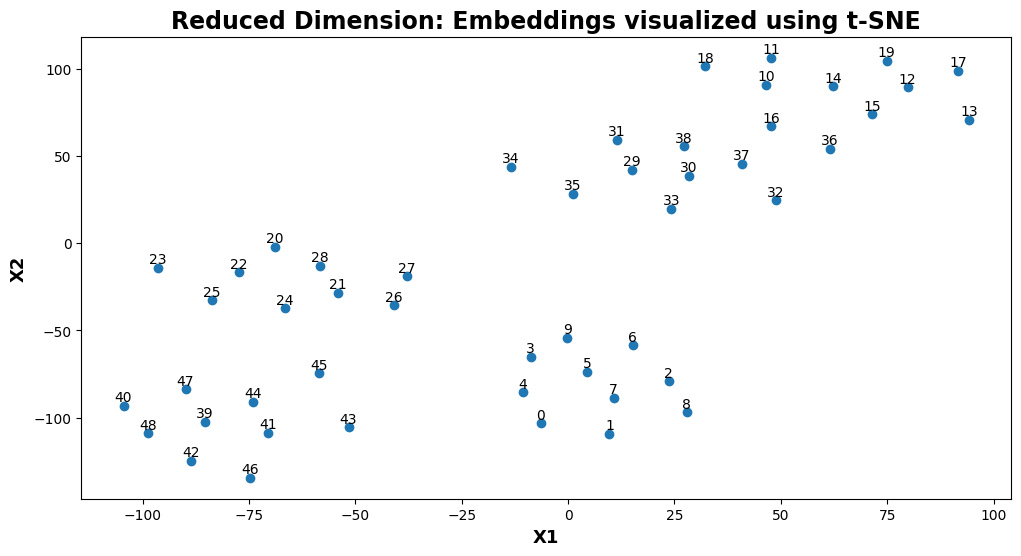

In [80]:
plt.rcParams['figure.figsize'] = (12, 6) 

matrix = np.vstack(df.embedding.values)

tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
#vis_dims2 = tsne.fit_transform(matrix)

vis_dims2 = tsne.fit_transform(matrix)
# xq_transformed=vis_dims2[-1]
# vis_dims2 = vis_dims2[:-1]


x_values = [x for x,y in vis_dims2]
y_values = [y for x,y in vis_dims2]


plt.scatter(x_values, y_values)
for i, (x, y) in enumerate(zip(x_values, y_values)):
    plt.annotate(str(i), (x, y), textcoords="offset points", xytext=(0, 3), ha='center')

plt.title("Reduced Dimension: Embeddings visualized using t-SNE", size=17, fontweight="bold")
plt.xlabel('X1',size=13, fontweight="bold")
plt.ylabel('X2',size=13, fontweight="bold")
# plt.scatter(xq_transformed[0], xq_transformed[1], marker='*', s=100, label='Stars', color='red')  # Use marker='*' for star shape
# plt.annotate("Xq", (xq_transformed[0], xq_transformed[1]), textcoords="offset points", xytext=(0,10), ha='center')

#plt.scatter(0,0)

Text(0, 10, 'Xq')

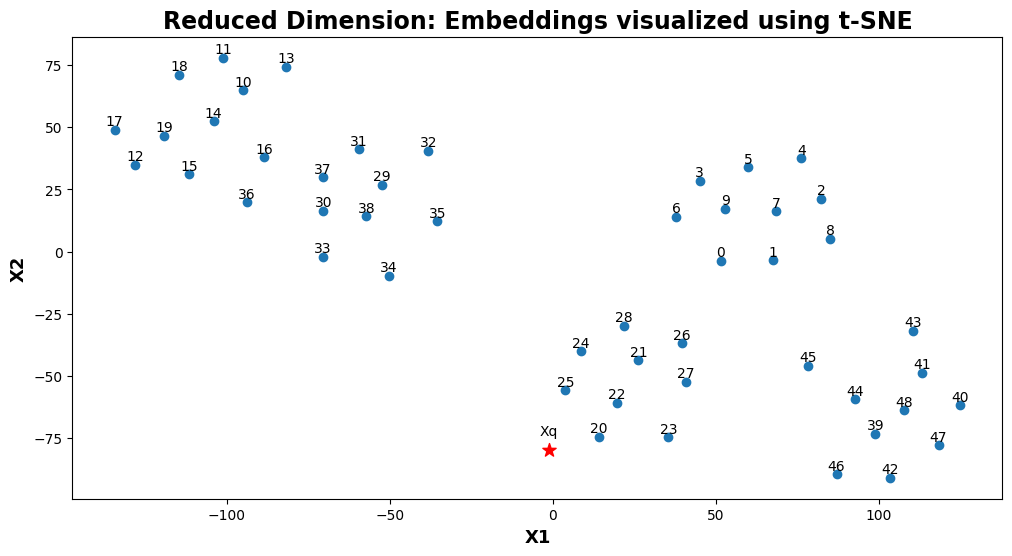

In [39]:
plt.rcParams['figure.figsize'] = (12, 6) 

matrix = np.vstack(df.embedding.values)

tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
#vis_dims2 = tsne.fit_transform(matrix)

vis_dims2 = tsne.fit_transform(new_matrix)
xq_transformed=vis_dims2[-1]
vis_dims2 = vis_dims2[:-1]


x_values = [x for x,y in vis_dims2]
y_values = [y for x,y in vis_dims2]


plt.scatter(x_values, y_values)
for i, (x, y) in enumerate(zip(x_values, y_values)):
    plt.annotate(str(i), (x, y), textcoords="offset points", xytext=(0, 3), ha='center')

plt.title("Reduced Dimension: Embeddings visualized using t-SNE", size=17, fontweight="bold")
plt.xlabel('X1',size=13, fontweight="bold")
plt.ylabel('X2',size=13, fontweight="bold")
plt.scatter(xq_transformed[0], xq_transformed[1], marker='*', s=100, label='Stars', color='red')  # Use marker='*' for star shape
plt.annotate("Xq", (xq_transformed[0], xq_transformed[1]), textcoords="offset points", xytext=(0,10), ha='center')

#plt.scatter(0,0)

In [62]:
xq_transformed

array([ -1.2783703, -79.753006 ], dtype=float32)

In [56]:
vis_dims2[-1]

array([ -1.2783703, -79.753006 ], dtype=float32)

In [58]:
len(vis_dims2[:-1])

49

In [ ]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
plt.rcParams['figure.figsize'] = (15, 8) 

tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
vis_dims2 = tsne.fit_transform(matrix)

x = [x for x,y in vis_dims2]
y = [y for x,y in vis_dims2]

#palette = sns.color_palette("inferno", num_cluster).as_hex() 
palette = sns.color_palette("husl", 5).as_hex()

for category, color in enumerate(palette):
    xs = np.array(x)[df.Cluster==category]
    ys = np.array(y)[df.Cluster==category]
    plt.scatter(xs, ys, color=color, alpha=0.3, s=50)

    avg_x = xs.mean()
    avg_y = ys.mean()
    
    plt.scatter(avg_x, avg_y, marker='*', color='black', s=300)
plt.title("Reduced Dimension: Embeddings visualized using t-SNE", size=17, fontweight="bold")
plt.xlabel('Axis 1',size=13, fontweight="bold")
plt.ylabel('Axis 2',size=13, fontweight="bold")
x = [x for x,y in vis_dims2]
y = [y for x,y in vis_dims2]

plt.scatter(x, y)


## With inner product

In [33]:
## With Inner Product

index1=faiss.IndexFlatIP(embedding_dimension)
index1.add(sentence_embeddings)

In [75]:
%%time
D, I = index1.search(xq, k)  # search
print(I)

[[20 28 22]]
CPU times: total: 0 ns
Wall time: 0 ns


In [79]:
import numpy as np

In [80]:
distance1=[]

for sub_array in sentence_embeddings:
    distance1.append(np.inner(sub_array, xq[0]))

In [86]:
# finding the index of smallest values

def finding_index_largevalue(lst, k):
    indexed_xx = list(enumerate(lst))

    # Sort the list of tuples based on the values (ascending order)
    sorted_xx = sorted(indexed_xx, key=lambda x: x[1], reverse=True)

    # Get the indices of the smallest three numbers
    smallest_indices = [i for i, value in sorted_xx[:k]]

    return smallest_indices

In [87]:
finding_index_largevalue(distance1, 3)

[20, 28, 22]

### Inverted File Index (IVF)

In [46]:
len(df['Topic'].unique())

5

In [94]:

model = SentenceTransformer('all-MiniLM-L6-v2') # it gives lower dimension 386

sentences = list(df['Sentence'])
sentence_embeddings = model.encode(sentences)


In [96]:
embedding_dimension=sentence_embeddings.shape[1]

In [105]:
xq=model.encode(['would like to know about Nobel Prize 2020'])


In [115]:
### For visualization of 
nlist=5
index = faiss.index_factory(embedding_dimension, 'IVF%s,Flat' % nlist)
index.train(sentence_embeddings)
index.add(sentence_embeddings)
index.nprobe = 3
faiss.write_index(index, 'faiss_ivf_flat_49smaple.index')

In [116]:
sentence_embeddings

array([[-0.02245325,  0.06005978,  0.02328431, ..., -0.00418614,
        -0.0167044 ,  0.02549867],
       [ 0.05956964,  0.09052653,  0.04526693, ...,  0.03716531,
        -0.00045426,  0.00222308],
       [-0.02499702,  0.07864024, -0.06531843, ...,  0.01722914,
         0.0349489 ,  0.01723398],
       ...,
       [-0.0496626 ,  0.07988509,  0.01601531, ..., -0.03858742,
        -0.05817487,  0.01126281],
       [-0.03232229,  0.06021214, -0.03257099, ...,  0.01232847,
        -0.08635767, -0.00835791],
       [-0.03489426, -0.00044589, -0.0042938 , ..., -0.00987644,
        -0.04844795, -0.01788819]], dtype=float32)

In [114]:
index

<faiss.swigfaiss.IndexIVFFlat; proxy of <Swig Object of type 'faiss::IndexIVFFlat *' at 0x00000158271D3A50> >

In [97]:
nlist=5

In [98]:
quantizer = faiss.IndexFlatIP(embedding_dimension)

In [99]:
index = faiss.IndexIVFFlat(quantizer, embedding_dimension, nlist)

In [100]:
index.ntotal

0

In [101]:
index.is_trained

False

In [102]:
index.train(sentence_embeddings)  # we must train the index to cluster into cells
index.add(sentence_embeddings)

In [103]:
index.nprobe=1

In [106]:
D, I = index.search(xq,3)

In [107]:
D

array([[0.43810534, 0.48188654, 0.5668097 ]], dtype=float32)

In [108]:
I

array([[22, 28, 20]], dtype=int64)

In [109]:
index.ntotal

49

In [111]:
faiss.write_index(index, 'faiss_ivf_flat_49smaple.index')

In [92]:
index

<faiss.swigfaiss.IndexIVFFlat; proxy of <Swig Object of type 'faiss::IndexIVFFlat *' at 0x00000158237669D0> >

In [59]:
index.make_direct_map()

In [60]:
index.reconstruct(1)

array([-8.78920615e-01, -2.00320914e-01,  1.40066326e+00,  2.97812045e-01,
        3.09739202e-01, -1.55532587e+00, -3.48271608e-01,  8.42093349e-01,
        1.80964787e-02, -5.28232932e-01,  1.53625697e-01, -1.03137028e+00,
        6.27384543e-01,  6.38164759e-01,  5.53533792e-01,  2.58873969e-01,
        4.32349384e-01, -7.66282494e-04, -2.73170352e-01, -3.16207111e-01,
       -1.39588520e-01, -5.90525687e-01,  3.50245565e-01, -2.46372178e-01,
        6.55929983e-01,  4.47966993e-01, -1.46524861e-01, -6.10144623e-02,
       -1.63685605e-01,  8.85207713e-01, -6.51448011e-01,  1.51749153e-03,
       -5.63357532e-01, -6.78787172e-01, -3.55585605e-01,  7.90808201e-01,
       -6.46325827e-01, -5.00222564e-01, -2.29379803e-01, -4.74935621e-01,
       -3.06465060e-01, -5.98730862e-01,  2.16626540e-01, -6.50354624e-01,
       -1.21138883e+00, -1.76948711e-01, -1.50169408e+00,  3.74099016e-01,
        1.20717740e+00, -6.83748484e-01,  1.92435473e-01,  7.49636352e-01,
       -1.28873125e-01,  

In [61]:
index.update_vectors

<bound method handle_Index.<locals>.replacement_update_vectors of <faiss.swigfaiss.IndexIVFFlat; proxy of <Swig Object of type 'faiss::IndexIVFFlat *' at 0x00000157AC2CB510> >>

## Create a clustering

In [62]:
sentence_embeddings

array([[-0.42515695, -0.17480928,  1.8467965 , ..., -0.39403406,
         0.19126715, -0.1485463 ],
       [-0.8789206 , -0.20032091,  1.4006633 , ..., -0.12888885,
         0.5168744 ,  0.5052479 ],
       [-0.9164636 ,  0.48573413,  0.835597  , ..., -0.9473189 ,
         0.17077821, -0.06990491],
       ...,
       [-0.26745307,  0.6485193 ,  0.2524073 , ..., -0.49776572,
        -0.55864733,  0.4125203 ],
       [-0.6442572 ,  0.79322594,  0.65196157, ..., -0.8812224 ,
        -0.950332  ,  0.47097167],
       [-0.43729913,  0.41195127,  1.1190987 , ..., -0.98400164,
        -0.17112163, -0.13521804]], dtype=float32)

In [63]:
df.head(3)

,index,Topic,Sentence,embedding
0,0,Soccer World Cup 2020,"The 2020 FIFA World Cup, a globally anticipated event, brought together nations from around the world.","[-0.42515686, -0.17480914, 1.8467963, 0.15087691, -0.009726069, -1.5424263, -0.6151803, 0.14795646, 0.2542171, -1.0142606, 0.27748397, -0.29301974, 0.15616056, 1.4512328, 1.20133, 0.12567022, 0.04..."
1,1,Soccer World Cup 2020,"Hosted in multiple cities, the 2020 Soccer World Cup was a month-long celebration of the beautiful game.","[-0.87892085, -0.20032081, 1.4006628, 0.29781196, 0.30973944, -1.5553259, -0.3482714, 0.84209317, 0.018096512, -0.5282332, 0.15362588, -1.0313705, 0.62738407, 0.63816476, 0.55353403, 0.25887442, 0..."
2,2,Soccer World Cup 2020,"It featured the world's top soccer teams, each vying for the coveted championship title in the Soccer World Cup.","[-0.9164636, 0.485734, 0.835597, 0.25221008, -0.4458836, -1.3331833, 0.011776918, 0.1932823, 0.32765415, -0.14176689, 0.96953464, -1.0926019, 0.79956025, 1.0075784, 0.4447724, 0.354306, 0.48823276..."


In [64]:
matrix = np.vstack(df.embedding.values)

from sklearn.cluster import KMeans
km_model = KMeans(n_clusters = 5, init ='k-means++', random_state = 42)
y = km_model.fit_predict(matrix)
df['Cluster']=y

c:\Users\kbdhu\anaconda3\envs\langchain\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [68]:
df.head(2)

,index,Topic,Sentence,embedding,Cluster
0,0,Soccer World Cup 2020,"The 2020 FIFA World Cup, a globally anticipated event, brought together nations from around the world.","[-0.42515686, -0.17480914, 1.8467963, 0.15087691, -0.009726069, -1.5424263, -0.6151803, 0.14795646, 0.2542171, -1.0142606, 0.27748397, -0.29301974, 0.15616056, 1.4512328, 1.20133, 0.12567022, 0.04...",0
1,1,Soccer World Cup 2020,"Hosted in multiple cities, the 2020 Soccer World Cup was a month-long celebration of the beautiful game.","[-0.87892085, -0.20032081, 1.4006628, 0.29781196, 0.30973944, -1.5553259, -0.3482714, 0.84209317, 0.018096512, -0.5282332, 0.15362588, -1.0313705, 0.62738407, 0.63816476, 0.55353403, 0.25887442, 0...",0


In [71]:
#plt.rcParams['figure.figsize'] = (15, 8) 

tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
vis_dims2 = tsne.fit_transform(matrix)

x = [x for x,y in vis_dims2]
y = [y for x,y in vis_dims2]

palette = sns.color_palette("husl", 5).as_hex()

lst=[]
for category, color in enumerate(palette):
    xs = np.array(x)[df.Cluster==category]
    ys = np.array(y)[df.Cluster==category]
    #plt.scatter(xs, ys, color=color, alpha=0.3, s=50)

    avg_x = xs.mean()
    avg_y = ys.mean()

    lst.append([avg_x, avg_y])
    
    #plt.scatter(avg_x, avg_y, marker='*', color='black', s=300)

lst=np.array(lst)


In [74]:
from scipy.spatial import Voronoi, voronoi_plot_2d


Text(0, 0.5, 'X2')

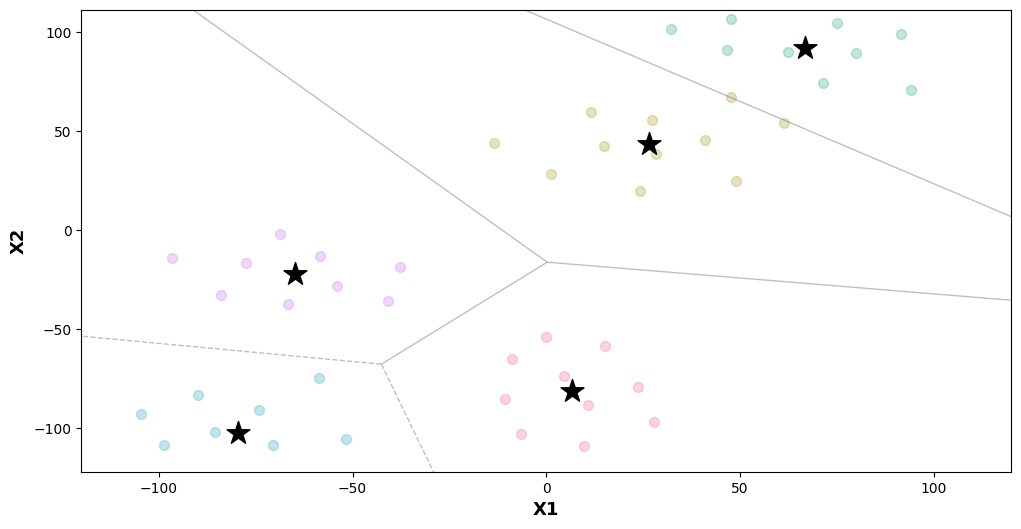

In [79]:
vor = Voronoi(lst)

# Plot Voronoi diagram
voronoi_plot_2d(vor, show_vertices=False, show_points=False, line_colors='gray', line_width=1, line_alpha=0.5)

palette = sns.color_palette("husl", 5).as_hex()

lst=[]
for category, color in enumerate(palette):
    xs = np.array(x)[df.Cluster==category]
    ys = np.array(y)[df.Cluster==category]
    plt.scatter(xs, ys, color=color, alpha=0.3, s=50)

    avg_x = xs.mean()
    avg_y = ys.mean()

    lst.append([avg_x, avg_y])
    
    plt.scatter(avg_x, avg_y, marker='*', color='black', s=300)

plt.xlim(-120,120)

#plt.title("Reduced Dimension: Embeddings visualized using t-SNE", size=17, fontweight="bold")
plt.xlabel('X1',size=13, fontweight="bold")
plt.ylabel('X2',size=13, fontweight="bold")

In [72]:
lst

array([[   6.555936,  -81.40666 ],
       [  26.628607,   43.57777 ],
       [  66.75273 ,   91.81255 ],
       [ -79.65934 , -102.71316 ],
       [ -64.92116 ,  -22.059519]], dtype=float32)

In [66]:
df.head(2)

,index,Topic,Sentence,embedding,Cluster
0,0,Soccer World Cup 2020,"The 2020 FIFA World Cup, a globally anticipated event, brought together nations from around the world.","[-0.42515686, -0.17480914, 1.8467963, 0.15087691, -0.009726069, -1.5424263, -0.6151803, 0.14795646, 0.2542171, -1.0142606, 0.27748397, -0.29301974, 0.15616056, 1.4512328, 1.20133, 0.12567022, 0.04...",0
1,1,Soccer World Cup 2020,"Hosted in multiple cities, the 2020 Soccer World Cup was a month-long celebration of the beautiful game.","[-0.87892085, -0.20032081, 1.4006628, 0.29781196, 0.30973944, -1.5553259, -0.3482714, 0.84209317, 0.018096512, -0.5282332, 0.15362588, -1.0313705, 0.62738407, 0.63816476, 0.55353403, 0.25887442, 0...",0


In [ ]:
#plt.rcParams['figure.figsize'] = (15, 8) 
# Create a Voronoi diagram
vor = Voronoi(lst)

# Plot Voronoi diagram
voronoi_plot_2d(vor, show_vertices=False, show_points=False, line_colors='gray', line_width=1, line_alpha=0.5)



palette = sns.color_palette("husl", 5).as_hex()

lst=[]
for category, color in enumerate(palette):
    xs = np.array(x)[df.Cluster==category]
    ys = np.array(y)[df.Cluster==category]
    plt.scatter(xs, ys, color=color, alpha=0.3, s=50)

    avg_x = xs.mean()
    avg_y = ys.mean()

    lst.append([avg_x, avg_y])
    
    plt.scatter(avg_x, avg_y, marker='*', color='black', s=300)

plt.xlim(-120,120)


    

In [26]:
from scipy.cluster.vq import kmeans2
import numpy as np

In [31]:
matrix = np.vstack(df.embedding.values)


In [32]:
from sklearn.cluster import KMeans

In [33]:
km_model = KMeans(n_clusters = 5, init ='k-means++', random_state = 42)
y = km_model.fit_predict(matrix)
df['Cluster']=y

c:\Users\kbdhu\anaconda3\envs\langchain\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [35]:
df['Cluster'].unique()

array([0, 2, 1, 4, 3])

In [40]:
centroids = km_model.cluster_centers_
cluster_lables=km_model.labels_

In [41]:
centroids

array([[-0.41817066,  0.13105027,  1.1183399 , ..., -0.28363967,
         0.09699684,  0.20333867],
       [-0.18692432,  0.26072162,  0.97205603, ...,  0.51830906,
        -0.53757656,  0.03525034],
       [-0.02437347,  0.2225582 ,  1.2443924 , ...,  0.24219632,
        -0.8283535 ,  0.2883847 ],
       [-0.47402304,  0.44249922,  0.913081  , ..., -0.6843335 ,
        -0.7435417 , -0.04688117],
       [-0.5432697 ,  0.57533014,  0.5941038 , ..., -0.5653111 ,
        -0.36119413, -0.520774  ]], dtype=float32)

In [42]:
cluster_lables

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3])

In [44]:
# Print the cluster centroids and cluster numbers
for cluster_num, centroid in enumerate(centroids):
    print(f"Cluster {cluster_num} Centroid: {centroid}")

# Print the cluster number for each data point
print("Cluster Numbers for Data Points:")
print(cluster_lables)

Cluster 0 Centroid: [-4.18170661e-01  1.31050274e-01  1.11833990e+00  5.76511770e-03
 -3.77405971e-01 -1.54999804e+00 -4.78265166e-01  1.70943469e-01
  4.64320332e-01 -4.06400561e-01  7.79879570e-01 -6.73810065e-01
  4.39269334e-01  9.83824849e-01  5.77717423e-01  2.92293668e-01
  3.10103238e-01 -9.34894830e-02 -1.02232322e-01 -5.21647930e-02
 -4.37154353e-01 -6.30432427e-01  4.44840223e-01  2.62684286e-01
  5.97150624e-01  6.40637279e-01 -2.42812932e-01 -1.23232603e-03
 -8.81475732e-02  8.76813531e-01 -3.52393627e-01 -2.54313707e-01
 -4.31921482e-01 -5.86851239e-01 -1.23344898e+00  3.94310534e-01
  2.28988335e-01 -2.08539993e-01 -2.37918243e-01 -5.94864070e-01
 -8.09837222e-01 -3.17838520e-01  3.11210573e-01 -1.08033031e-01
 -5.49015880e-01 -3.65329742e-01 -1.39510703e+00  5.99575281e-01
  6.13166451e-01 -3.16416711e-01  1.20753646e-01  5.13429821e-01
 -5.65159559e-01 -2.78084278e-01 -4.60709870e-01  4.39810812e-01
 -1.58710197e-01 -3.16892624e-01 -1.21885240e+00 -7.10301518e-01
 -2.6

In [45]:
df.head(2)

,index,Topic,Sentence,embedding,Cluster
0,0,Soccer World Cup 2020,"The 2020 FIFA World Cup, a globally anticipated event, brought together nations from around the world.","[-0.42515686, -0.17480914, 1.8467963, 0.15087691, -0.009726069, -1.5424263, -0.6151803, 0.14795646, 0.2542171, -1.0142606, 0.27748397, -0.29301974, 0.15616056, 1.4512328, 1.20133, 0.12567022, 0.04...",0
1,1,Soccer World Cup 2020,"Hosted in multiple cities, the 2020 Soccer World Cup was a month-long celebration of the beautiful game.","[-0.87892085, -0.20032081, 1.4006628, 0.29781196, 0.30973944, -1.5553259, -0.3482714, 0.84209317, 0.018096512, -0.5282332, 0.15362588, -1.0313705, 0.62738407, 0.63816476, 0.55353403, 0.25887442, 0...",0


In [47]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os

Text(0, 0.5, 'Axis 2')

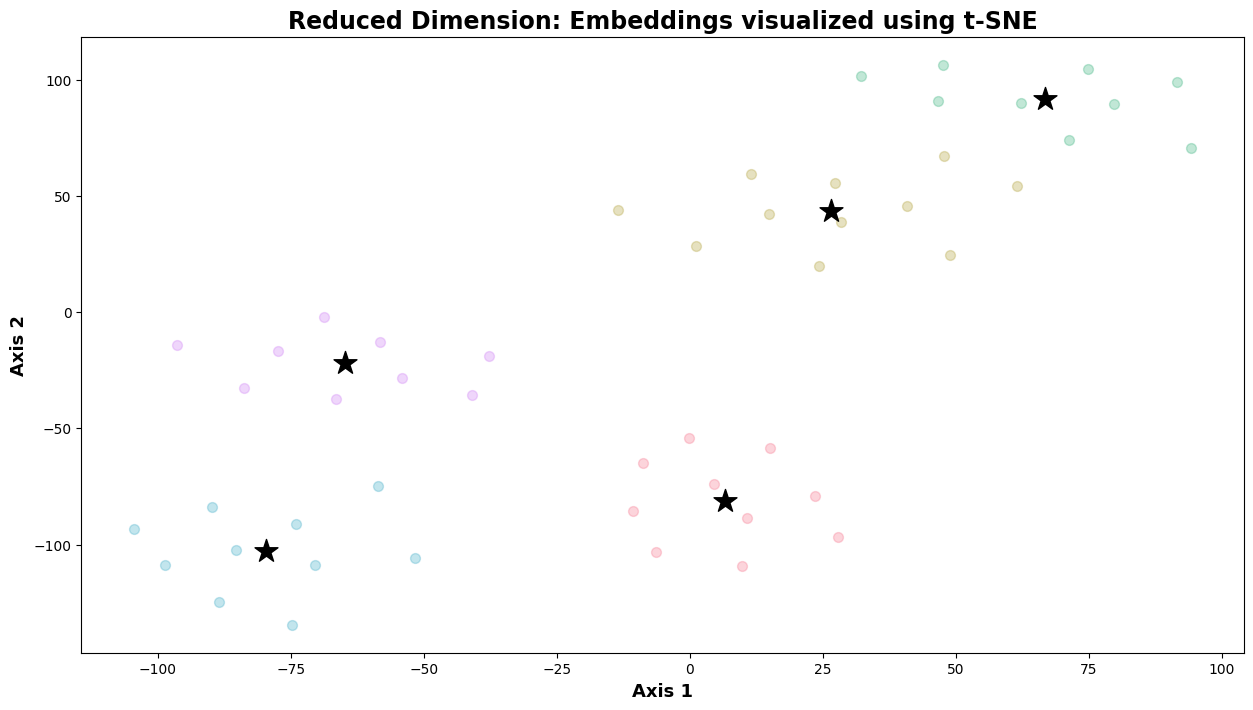

In [49]:
plt.rcParams['figure.figsize'] = (15, 8) 

tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
vis_dims2 = tsne.fit_transform(matrix)

x = [x for x,y in vis_dims2]
y = [y for x,y in vis_dims2]

#palette = sns.color_palette("inferno", num_cluster).as_hex() 
palette = sns.color_palette("husl", 5).as_hex()

for category, color in enumerate(palette):
    xs = np.array(x)[df.Cluster==category]
    ys = np.array(y)[df.Cluster==category]
    plt.scatter(xs, ys, color=color, alpha=0.3, s=50)

    avg_x = xs.mean()
    avg_y = ys.mean()
    
    plt.scatter(avg_x, avg_y, marker='*', color='black', s=300)
plt.title("Reduced Dimension: Embeddings visualized using t-SNE", size=17, fontweight="bold")
plt.xlabel('Axis 1',size=13, fontweight="bold")
plt.ylabel('Axis 2',size=13, fontweight="bold")

In [55]:
x = [x for x,y in vis_dims2]
y = [y for x,y in vis_dims2]


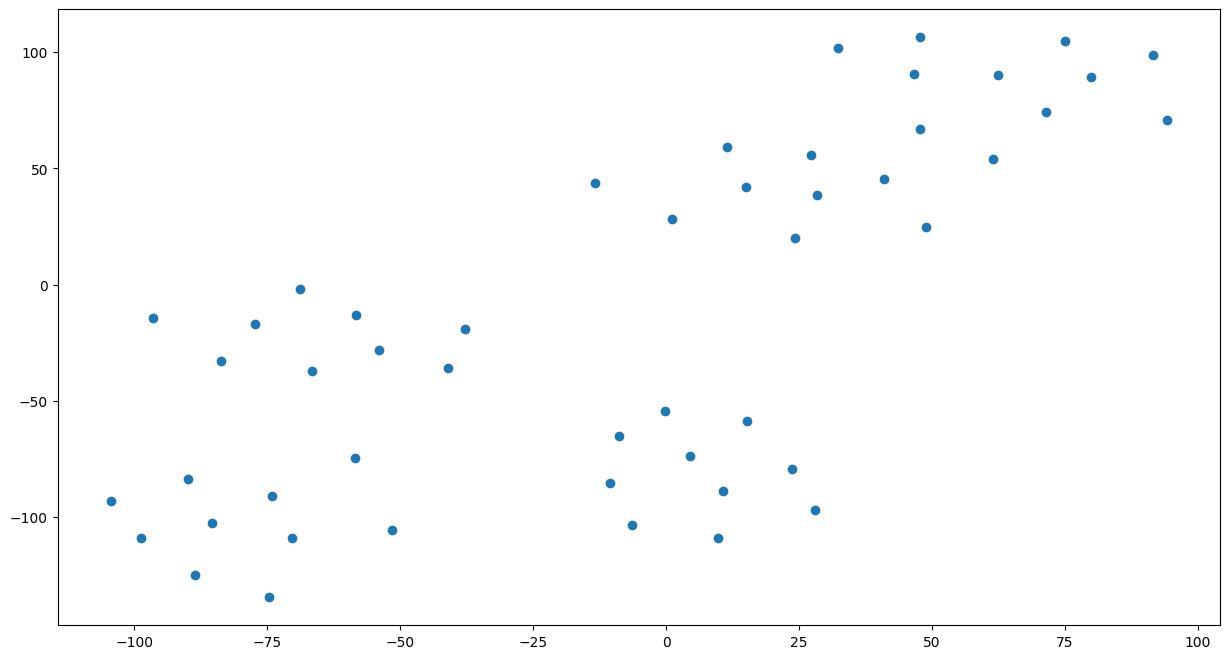

In [56]:
plt.scatter(x, y)

In [61]:
len(x), len(y)

(49, 49)

In [77]:
lst

array([[-64.92116 , -22.059519]], dtype=float32)

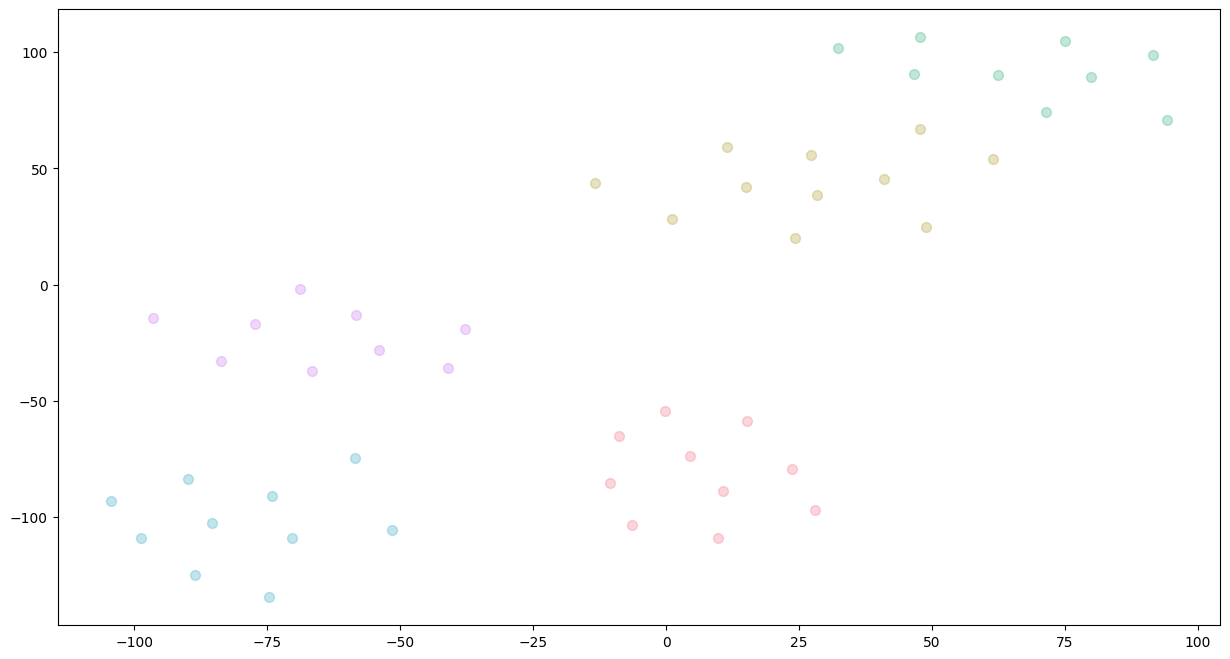

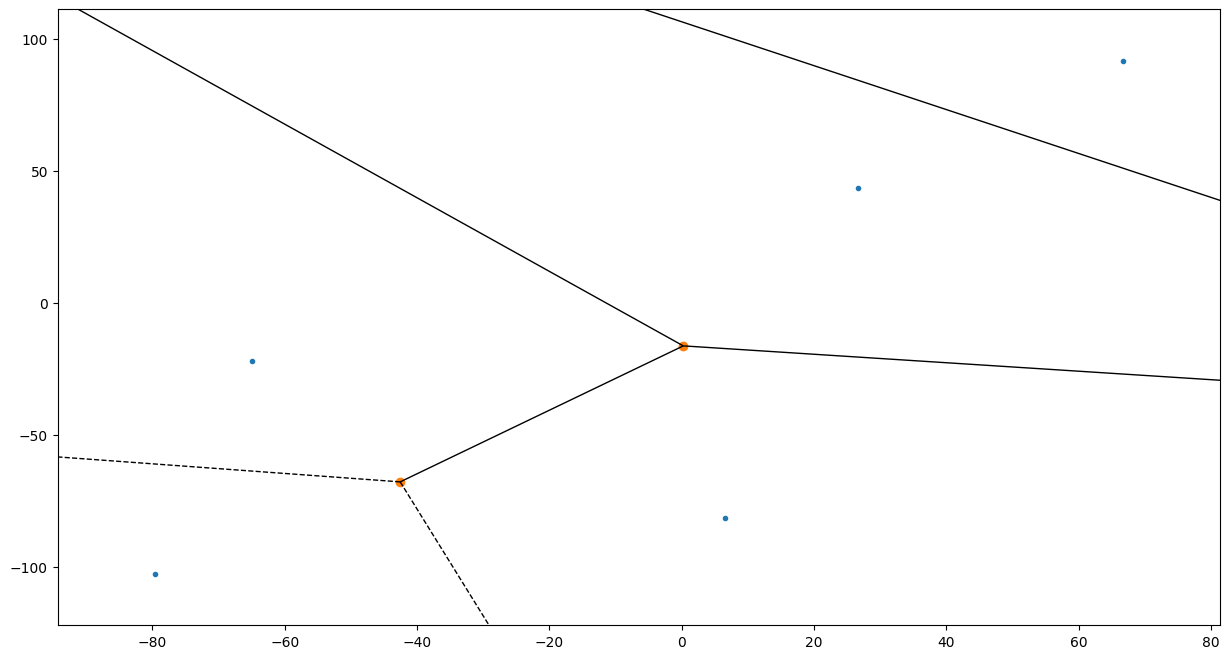

In [83]:
#plt.rcParams['figure.figsize'] = (15, 8) 

palette = sns.color_palette("husl", 5).as_hex()

lst=[]
for category, color in enumerate(palette):
    xs = np.array(x)[df.Cluster==category]
    ys = np.array(y)[df.Cluster==category]
    plt.scatter(xs, ys, color=color, alpha=0.3, s=50)

    avg_x = xs.mean()
    avg_y = ys.mean()

    lst.append([avg_x, avg_y])
    
    #plt.scatter(avg_x, avg_y, marker='*', color='black', s=300)


lst=np.array(lst)

from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(lst)
import matplotlib.pyplot as plt
fig = voronoi_plot_2d(vor)


#plt.show()

    

In [84]:
centroids

array([[-0.41817066,  0.13105027,  1.1183399 , ..., -0.28363967,
         0.09699684,  0.20333867],
       [-0.18692432,  0.26072162,  0.97205603, ...,  0.51830906,
        -0.53757656,  0.03525034],
       [-0.02437347,  0.2225582 ,  1.2443924 , ...,  0.24219632,
        -0.8283535 ,  0.2883847 ],
       [-0.47402304,  0.44249922,  0.913081  , ..., -0.6843335 ,
        -0.7435417 , -0.04688117],
       [-0.5432697 ,  0.57533014,  0.5941038 , ..., -0.5653111 ,
        -0.36119413, -0.520774  ]], dtype=float32)

(-120.0, 120.0)

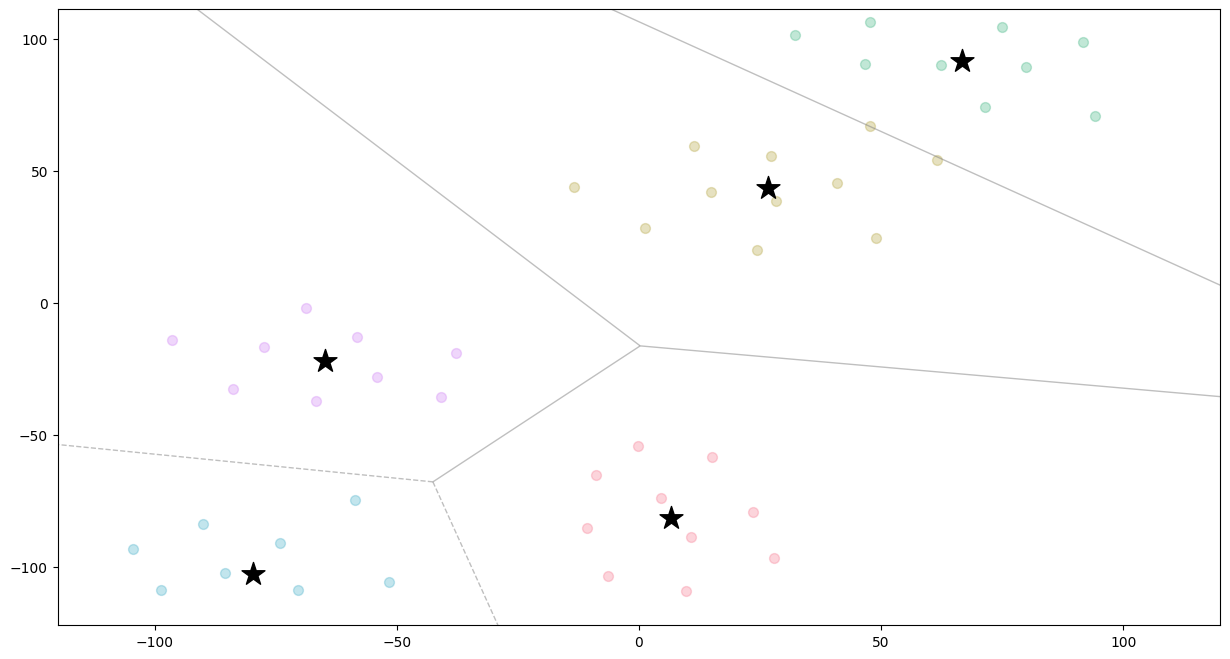

In [92]:
#plt.rcParams['figure.figsize'] = (15, 8) 
# Create a Voronoi diagram
vor = Voronoi(lst)

# Plot Voronoi diagram
voronoi_plot_2d(vor, show_vertices=False, show_points=False, line_colors='gray', line_width=1, line_alpha=0.5)


palette = sns.color_palette("husl", 5).as_hex()

lst=[]
for category, color in enumerate(palette):
    xs = np.array(x)[df.Cluster==category]
    ys = np.array(y)[df.Cluster==category]
    plt.scatter(xs, ys, color=color, alpha=0.3, s=50)

    avg_x = xs.mean()
    avg_y = ys.mean()

    lst.append([avg_x, avg_y])
    
    plt.scatter(avg_x, avg_y, marker='*', color='black', s=300)

plt.xlim(-120,120)


# lst=np.array(lst)

# from scipy.spatial import Voronoi, voronoi_plot_2d
# vor = Voronoi(lst)
# import matplotlib.pyplot as plt
# fig = voronoi_plot_2d(vor)


# #plt.show()

    

In [87]:
lst

array([[   6.555936,  -81.40666 ],
       [  26.628607,   43.57777 ],
       [  66.75273 ,   91.81255 ],
       [ -79.65934 , -102.71316 ],
       [ -64.92116 ,  -22.059519]], dtype=float32)

In [72]:
centroids

array([[-0.41817066,  0.13105027,  1.1183399 , ..., -0.28363967,
         0.09699684,  0.20333867],
       [-0.18692432,  0.26072162,  0.97205603, ...,  0.51830906,
        -0.53757656,  0.03525034],
       [-0.02437347,  0.2225582 ,  1.2443924 , ...,  0.24219632,
        -0.8283535 ,  0.2883847 ],
       [-0.47402304,  0.44249922,  0.913081  , ..., -0.6843335 ,
        -0.7435417 , -0.04688117],
       [-0.5432697 ,  0.57533014,  0.5941038 , ..., -0.5653111 ,
        -0.36119413, -0.520774  ]], dtype=float32)

In [64]:
tt=[]
for xx, yy in zip(x, y):
    tt.append([xx,yy])

In [67]:
tt=np.array(tt)

In [75]:
tt

array([[  -6.445908  , -103.302666  ],
       [   9.729139  , -109.11126   ],
       [  23.621773  ,  -79.19589   ],
       [  -8.83166   ,  -65.06194   ],
       [ -10.631714  ,  -85.491875  ],
       [   4.5082073 ,  -73.81523   ],
       [  15.168807  ,  -58.51086   ],
       [  10.711408  ,  -88.54219   ],
       [  27.883678  ,  -96.84638   ],
       [  -0.15437251,  -54.18828   ],
       [  46.57889   ,   90.71536   ],
       [  47.65307   ,  106.377075  ],
       [  79.81238   ,   89.4582    ],
       [  94.23538   ,   70.71761   ],
       [  62.305218  ,   89.974495  ],
       [  71.38832   ,   74.06985   ],
       [  47.770245  ,   67.14111   ],
       [  91.61817   ,   98.854     ],
       [  32.278763  ,  101.57816   ],
       [  74.90434   ,  104.56822   ],
       [ -68.840416  ,   -1.9653544 ],
       [ -54.08054   ,  -28.241837  ],
       [ -77.3623    ,  -16.763897  ],
       [ -96.50251   ,  -14.134314  ],
       [ -66.58611   ,  -37.25744   ],
       [ -83.81617   ,  -

In [68]:
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(tt)

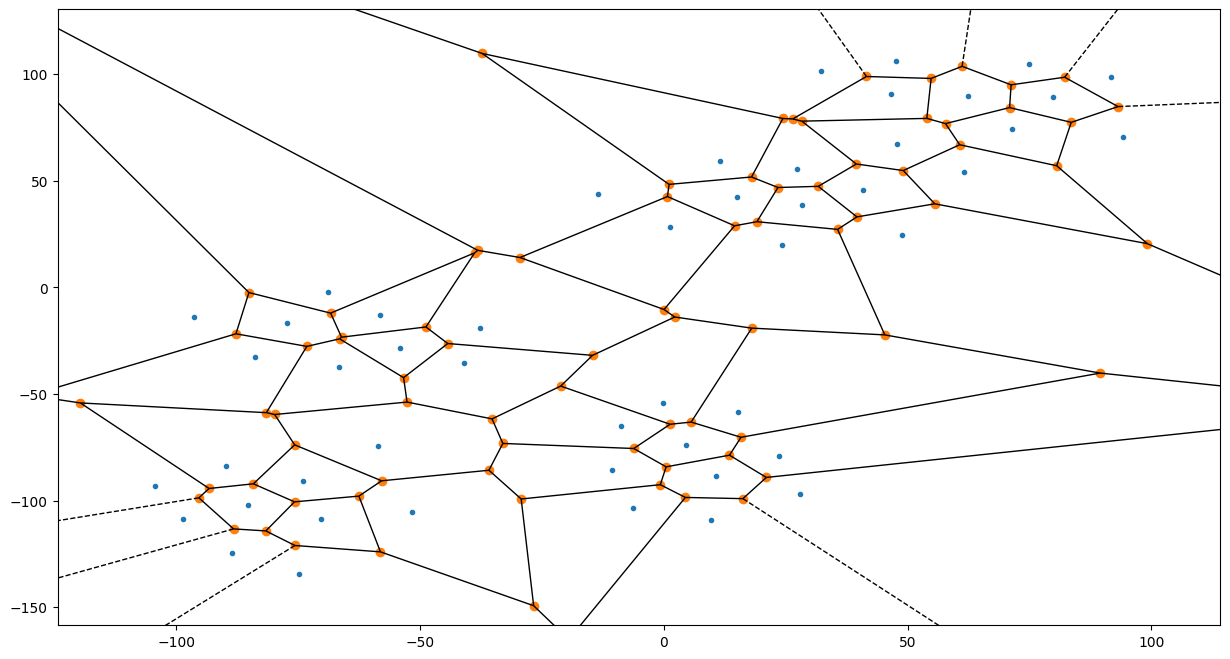

In [69]:
import matplotlib.pyplot as plt
fig = voronoi_plot_2d(vor)
plt.show()

In [27]:
np.array(list(df['embedding']))

array([[-0.42515686, -0.17480914,  1.8467963 , ..., -0.39403397,
         0.19126718, -0.14854631],
       [-0.87892085, -0.20032081,  1.4006628 , ..., -0.12888849,
         0.5168746 ,  0.50524783],
       [-0.9164636 ,  0.485734  ,  0.835597  , ..., -0.94731915,
         0.17077836, -0.06990501],
       ...,
       [-0.26745307,  0.6485195 ,  0.25240713, ..., -0.49776563,
        -0.55864716,  0.41252035],
       [-0.6442571 ,  0.79322594,  0.6519614 , ..., -0.881223  ,
        -0.9503322 ,  0.47097152],
       [-0.43729922,  0.41195118,  1.1190987 , ..., -0.9840016 ,
        -0.17112155, -0.13521807]], dtype=float32)

In [28]:
(centroids, assignments) = kmeans2(np.array(list(df['embedding'])), 5, iter=32)

In [30]:
len(centroids)

5

## Quantization

In [122]:
## Quantization

In [106]:
I

array([[20, 28, 22]], dtype=int64)

In [ ]:
index.train()

In [97]:
sentence_embeddings

array([[-0.42515695, -0.17480928,  1.8467965 , ..., -0.39403406,
         0.19126715, -0.1485463 ],
       [-0.8789206 , -0.20032091,  1.4006633 , ..., -0.12888885,
         0.5168744 ,  0.5052479 ],
       [-0.9164636 ,  0.48573413,  0.835597  , ..., -0.9473189 ,
         0.17077821, -0.06990491],
       ...,
       [-0.26745307,  0.6485193 ,  0.2524073 , ..., -0.49776572,
        -0.55864733,  0.4125203 ],
       [-0.6442572 ,  0.79322594,  0.65196157, ..., -0.8812224 ,
        -0.950332  ,  0.47097167],
       [-0.43729913,  0.41195127,  1.1190987 , ..., -0.98400164,
        -0.17112163, -0.13521804]], dtype=float32)

In [94]:
quantizer

<faiss.swigfaiss.IndexFlatIP; proxy of <Swig Object of type 'faiss::IndexFlatIP *' at 0x00000220011E0A20> >

In [84]:
distance1,distance

([155.19772,
  95.0186,
  84.033005,
  66.216194,
  82.4967,
  50.206688,
  74.25874,
  75.12683,
  119.66768,
  58.274055,
  38.979294,
  33.535236,
  67.57256,
  41.707336,
  46.583885,
  45.57875,
  44.284096,
  57.851154,
  34.28591,
  72.33887,
  198.2804,
  133.53392,
  175.23697,
  116.05516,
  116.32213,
  149.47972,
  117.24887,
  127.70566,
  184.62369,
  21.832623,
  29.453102,
  21.391949,
  2.6531005,
  28.133362,
  36.21993,
  31.779198,
  35.057487,
  38.706673,
  36.377842,
  77.74094,
  80.36843,
  62.381065,
  37.004543,
  45.26575,
  88.090645,
  53.43151,
  25.788511,
  70.1775,
  111.988335],
 [15.408841133117676,
  18.943456649780273,
  19.75973892211914,
  20.474557876586914,
  19.392013549804688,
  21.283416748046875,
  19.625619888305664,
  19.85055923461914,
  17.203113555908203,
  20.712594985961914,
  21.880653381347656,
  22.119953155517578,
  20.537029266357422,
  21.44305992126465,
  21.569242477416992,
  21.669479370117188,
  21.42273712158203,
  20.7607

In [81]:
finding_index_smallvalue(distance1, 3)

[32, 31, 29]

In [82]:
df.iloc[[32, 31, 29]]

,index,Topic,Sentence
32,32,Keeping Pets at Home,"Cats, independent and graceful, bring tranquility and comfort to homes with their purring and soft fur."
31,31,Keeping Pets at Home,"Dogs, known for loyalty, provide affection, protection, and endless joy, making them cherished members of many households."
29,29,Keeping Pets at Home,"Keeping pets at home is a rewarding and fulfilling experience, where pets, whether dogs, cats, birds, or reptiles, become beloved members of the family."


In [70]:
distance

[15.408841133117676,
 18.943456649780273,
 19.75973892211914,
 20.474557876586914,
 19.392013549804688,
 21.283416748046875,
 19.625619888305664,
 19.85055923461914,
 17.203113555908203,
 20.712594985961914,
 21.880653381347656,
 22.119953155517578,
 20.537029266357422,
 21.44305992126465,
 21.569242477416992,
 21.669479370117188,
 21.42273712158203,
 20.76072120666504,
 21.940349578857422,
 19.76115608215332,
 12.171476364135742,
 16.797073364257812,
 13.633045196533203,
 17.625825881958008,
 17.566072463989258,
 15.40494155883789,
 17.34334945678711,
 16.593116760253906,
 13.579171180725098,
 22.417646408081055,
 22.309263229370117,
 22.815692901611328,
 23.607315063476562,
 22.301692962646484,
 21.935537338256836,
 21.992931365966797,
 22.016855239868164,
 22.01239776611328,
 21.99883460998535,
 20.116844177246094,
 19.227598190307617,
 20.586917877197266,
 21.965911865234375,
 20.847265243530273,
 19.371963500976562,
 20.94151496887207,
 22.33850860595703,
 19.70229148864746,
 17.9

In [69]:
distance1

[155.19772,
 95.0186,
 84.033005,
 66.216194,
 82.4967,
 50.206688,
 74.25874,
 75.12683,
 119.66768,
 58.274055,
 38.979294,
 33.535236,
 67.57256,
 41.707336,
 46.583885,
 45.57875,
 44.284096,
 57.851154,
 34.28591,
 72.33887,
 198.2804,
 133.53392,
 175.23697,
 116.05516,
 116.32213,
 149.47972,
 117.24887,
 127.70566,
 184.62369,
 21.832623,
 29.453102,
 21.391949,
 2.6531005,
 28.133362,
 36.21993,
 31.779198,
 35.057487,
 38.706673,
 36.377842,
 77.74094,
 80.36843,
 62.381065,
 37.004543,
 45.26575,
 88.090645,
 53.43151,
 25.788511,
 70.1775,
 111.988335]

In [52]:
distance1

[155.19772,
 95.0186,
 84.033005,
 66.216194,
 82.4967,
 50.206688,
 74.25874,
 75.12683,
 119.66768,
 58.274055,
 38.979294,
 33.535236,
 67.57256,
 41.707336,
 46.583885,
 45.57875,
 44.284096,
 57.851154,
 34.28591,
 72.33887,
 198.2804,
 133.53392,
 175.23697,
 116.05516,
 116.32213,
 149.47972,
 117.24887,
 127.70566,
 184.62369,
 21.832623,
 29.453102,
 21.391949,
 2.6531005,
 28.133362,
 36.21993,
 31.779198,
 35.057487,
 38.706673,
 36.377842,
 77.74094,
 80.36843,
 62.381065,
 37.004543,
 45.26575,
 88.090645,
 53.43151,
 25.788511,
 70.1775,
 111.988335]

In [44]:
distance

[15.408841133117676,
 18.943456649780273,
 19.75973892211914,
 20.474557876586914,
 19.392013549804688,
 21.283416748046875,
 19.625619888305664,
 19.85055923461914,
 17.203113555908203,
 20.712594985961914,
 21.880653381347656,
 22.119953155517578,
 20.537029266357422,
 21.44305992126465,
 21.569242477416992,
 21.669479370117188,
 21.42273712158203,
 20.76072120666504,
 21.940349578857422,
 19.76115608215332,
 12.171476364135742,
 16.797073364257812,
 13.633045196533203,
 17.625825881958008,
 17.566072463989258,
 15.40494155883789,
 17.34334945678711,
 16.593116760253906,
 13.579171180725098,
 22.417646408081055,
 22.309263229370117,
 22.815692901611328,
 23.607315063476562,
 22.301692962646484,
 21.935537338256836,
 21.992931365966797,
 22.016855239868164,
 22.01239776611328,
 21.99883460998535,
 20.116844177246094,
 19.227598190307617,
 20.586917877197266,
 21.965911865234375,
 20.847265243530273,
 19.371963500976562,
 20.94151496887207,
 22.33850860595703,
 19.70229148864746,
 17.9

In [41]:
xx = [1, 5, 6, 0, 10, 4, 2, 7, 3]

# Use enumerate to get the index along with the value
indexed_xx = list(enumerate(xx))

# Sort the list of tuples based on the values (ascending order)
sorted_xx = sorted(indexed_xx, key=lambda x: x[1])

# Get the indices of the smallest three numbers
smallest_indices = [index for index, value in sorted_xx[:3]]

print("Indices of the smallest three numbers:", smallest_indices)


Indices of the smallest three numbers: [3, 0, 6]


In [42]:
indexed_xx

[(0, 1), (1, 5), (2, 6), (3, 0), (4, 10), (5, 4), (6, 2), (7, 7), (8, 3)]

In [43]:
sorted_xx

[(3, 0), (0, 1), (6, 2), (8, 3), (5, 4), (1, 5), (2, 6), (7, 7), (4, 10)]

In [40]:
distance

[15.408841133117676,
 18.943456649780273,
 19.75973892211914,
 20.474557876586914,
 19.392013549804688,
 21.283416748046875,
 19.625619888305664,
 19.85055923461914,
 17.203113555908203,
 20.712594985961914,
 21.880653381347656,
 22.119953155517578,
 20.537029266357422,
 21.44305992126465,
 21.569242477416992,
 21.669479370117188,
 21.42273712158203,
 20.76072120666504,
 21.940349578857422,
 19.76115608215332,
 12.171476364135742,
 16.797073364257812,
 13.633045196533203,
 17.625825881958008,
 17.566072463989258,
 15.40494155883789,
 17.34334945678711,
 16.593116760253906,
 13.579171180725098,
 22.417646408081055,
 22.309263229370117,
 22.815692901611328,
 23.607315063476562,
 22.301692962646484,
 21.935537338256836,
 21.992931365966797,
 22.016855239868164,
 22.01239776611328,
 21.99883460998535,
 20.116844177246094,
 19.227598190307617,
 20.586917877197266,
 21.965911865234375,
 20.847265243530273,
 19.371963500976562,
 20.94151496887207,
 22.33850860595703,
 19.70229148864746,
 17.9

In [32]:
euclidean(sentence_embeddings, xq)

ValueError: Input vector should be 1-D.

In [30]:
sentence_embeddings

array([[-0.42515695, -0.17480928,  1.8467965 , ..., -0.39403406,
         0.19126715, -0.1485463 ],
       [-0.8789206 , -0.20032091,  1.4006633 , ..., -0.12888885,
         0.5168744 ,  0.5052479 ],
       [-0.9164636 ,  0.48573413,  0.835597  , ..., -0.9473189 ,
         0.17077821, -0.06990491],
       ...,
       [-0.26745307,  0.6485193 ,  0.2524073 , ..., -0.49776572,
        -0.55864733,  0.4125203 ],
       [-0.6442572 ,  0.79322594,  0.65196157, ..., -0.8812224 ,
        -0.950332  ,  0.47097167],
       [-0.43729913,  0.41195127,  1.1190987 , ..., -0.98400164,
        -0.17112163, -0.13521804]], dtype=float32)

In [29]:
xq

array([[-3.81701648e-01, -4.04578060e-01,  1.21103776e+00,
         9.71325189e-02,  5.77969253e-01, -8.08756828e-01,
        -9.37761903e-01, -3.65120709e-01,  7.37179637e-01,
        -8.85952175e-01, -6.08786121e-02,  7.51918197e-01,
         3.61013353e-01,  1.18043625e+00,  1.21623158e-01,
        -1.67164236e-01, -5.13558924e-01, -6.40886948e-02,
         6.32150322e-02, -4.21555609e-01,  3.80068958e-01,
         4.31368828e-01,  6.15519993e-02, -2.81333268e-01,
         1.06764960e+00, -5.32801270e-01, -3.87867153e-01,
        -3.97076905e-01,  3.80420506e-01,  5.66727161e-01,
        -3.47353518e-01,  7.94552922e-01, -1.02567625e+00,
        -1.56264096e-01, -1.27178025e+00,  5.37283182e-01,
        -6.65345322e-03,  1.42730623e-01,  1.68421462e-01,
         7.30923772e-01,  4.42011505e-02, -5.56821108e-01,
        -1.17749617e-01,  4.82681513e-01, -1.55967593e+00,
        -1.27712309e+00, -3.74664962e-01, -5.83819747e-01,
        -8.42892304e-02, -1.50736117e+00, -4.15233850e-0

In [118]:
sentences

["Lionel Messi's incredible goal in the last minute secured a thrilling victory for his team.",
 'Passionate fans from all around the world gathered at the stadium to cheer for their favorite teams.',
 'Cristiano Ronaldo, known for his remarkable skills and dedication, has become a legendary figure in the sport.',
 'The referee issued a red card to the player who committed a dangerous foul, changing the dynamics of the match.',
 'The agile goalkeeper made a series of great saves, preventing the opposing team from scoring.',
 'In a highly competitive game, the match ended in a goalless draw, leaving both teams with one point.',
 'The tension was palpable as the referee blew the final whistle, signaling the end of an intense match.',
 'A crucial penalty kick was awarded in the dying minutes, putting immense pressure on the penalty-taker.',
 'The entire city celebrated when their beloved soccer team clinched the championship title.',
 'In a thrilling turn of events, injury time brought un

In [6]:
import requests
from io import StringIO
import pandas as pd

In [7]:
res = requests.get('https://raw.githubusercontent.com/brmson/dataset-sts/master/data/sts/sick2014/SICK_train.txt')
# create dataframe
data = pd.read_csv(StringIO(res.text), sep='\t')
data.head()

,pair_ID,sentence_A,sentence_B,relatedness_score,entailment_judgment
0,1,A group of kids is playing in a yard and an ol...,A group of boys in a yard is playing and a man...,4.5,NEUTRAL
1,2,A group of children is playing in the house an...,A group of kids is playing in a yard and an ol...,3.2,NEUTRAL
2,3,The young boys are playing outdoors and the ma...,The kids are playing outdoors near a man with ...,4.7,ENTAILMENT
3,5,The kids are playing outdoors near a man with ...,A group of kids is playing in a yard and an ol...,3.4,NEUTRAL
4,9,The young boys are playing outdoors and the ma...,A group of kids is playing in a yard and an ol...,3.7,NEUTRAL


In [8]:
data.shape

(4500, 5)

In [9]:
# we take all samples from both sentence A and B
sentences = data['sentence_A'].tolist()
sentences[:5]

['A group of kids is playing in a yard and an old man is standing in the background',
 'A group of children is playing in the house and there is no man standing in the background',
 'The young boys are playing outdoors and the man is smiling nearby',
 'The kids are playing outdoors near a man with a smile',
 'The young boys are playing outdoors and the man is smiling nearby']

In [10]:
# we take all samples from both sentence A and B
sentences = data['sentence_A'].tolist()
sentence_b = data['sentence_B'].tolist()
sentences.extend(sentence_b)  # merge them
len(set(sentences))  # together we have ~4.5K unique sentences

4802

In [11]:
urls = [
    'https://raw.githubusercontent.com/brmson/dataset-sts/master/data/sts/semeval-sts/2012/MSRpar.train.tsv',
    'https://raw.githubusercontent.com/brmson/dataset-sts/master/data/sts/semeval-sts/2012/MSRpar.test.tsv',
    'https://raw.githubusercontent.com/brmson/dataset-sts/master/data/sts/semeval-sts/2012/OnWN.test.tsv',
    'https://raw.githubusercontent.com/brmson/dataset-sts/master/data/sts/semeval-sts/2013/OnWN.test.tsv',
    'https://raw.githubusercontent.com/brmson/dataset-sts/master/data/sts/semeval-sts/2014/OnWN.test.tsv',
    'https://raw.githubusercontent.com/brmson/dataset-sts/master/data/sts/semeval-sts/2014/images.test.tsv',
    'https://raw.githubusercontent.com/brmson/dataset-sts/master/data/sts/semeval-sts/2015/images.test.tsv'
]

In [14]:
# remove duplicates and NaN
sentences = [word for word in list(set(sentences)) if type(word) is str]

In [15]:
sentences[0]

'A great singer is dancing on the ceiling'

In [16]:
len(sentences)

4802

In [17]:
from sentence_transformers import SentenceTransformer


In [18]:
model = SentenceTransformer('bert-base-nli-mean-tokens')


In [20]:
sentence_embeddings = model.encode(sentences)
sentence_embeddings.shape

(4802, 768)

In [46]:
len(sentence_embeddings)

4802

In [47]:
import faiss

In [55]:
d=sentence_embeddings.shape[1]
d

768

In [56]:
index = faiss.IndexFlatL2(d)

In [57]:
index.is_trained

True

In [58]:
index.d # most likely dimenion

768

In [59]:
index

<faiss.swigfaiss.IndexFlatL2; proxy of <Swig Object of type 'faiss::IndexFlatL2 *' at 0x000001DA1789AAF0> >

In [60]:
index.add(sentence_embeddings)

In [61]:
index.ntotal

4802

In [63]:
k = 4
xq = model.encode(['Some sprints with a football'])

In [66]:
len(xq[0])

768

In [67]:
%%time
D, I = index.search(xq, k)  # search
print(I)

[[3087 3698 2393 1140]]
CPU times: total: 0 ns
Wall time: 12 ms


In [68]:
data['sentence_A'].iloc[[3087, 3698, 2393, 1140]]

3087     There is no man on a bicycle riding on the beach
3698    Adults and children standing and playing in fr...
2393                       A man is playing a small flute
1140    A person is absently cutting mushrooms with a ...
Name: sentence_A, dtype: object

In [69]:
I

array([[3087, 3698, 2393, 1140]], dtype=int64)

In [72]:
index.reconstruct(3038)

array([ 9.28479493e-01,  8.88930380e-01,  6.62471354e-01, -2.26962820e-01,
        1.14660740e-01,  9.83961701e-01,  2.60791516e+00,  1.58596829e-01,
       -4.63023603e-01,  3.91623855e-01, -6.38253331e-01, -3.89604390e-01,
        6.66258872e-01,  7.26269424e-01, -2.76852489e-01,  9.72813666e-02,
        5.82503200e-01,  4.23318781e-02,  9.03028324e-02, -2.85311460e-01,
       -6.49049640e-01,  4.58024107e-02,  8.11458290e-01, -8.54693174e-01,
        4.30270463e-01, -5.91429435e-02, -9.20499023e-03,  4.12171334e-01,
       -3.12453777e-01, -1.73631497e-02,  7.58444518e-02,  8.54093134e-01,
        4.58397686e-01, -2.61388600e-01,  9.17677343e-01, -2.93840259e-01,
        2.97573864e-01, -1.50773063e-01,  1.84402317e-01, -4.98624355e-01,
       -6.71222270e-01,  1.71516575e-02,  4.16951060e-01,  7.81695321e-02,
        3.77101421e-01,  9.01443586e-02,  8.63117218e-01, -1.55853689e-01,
        4.86998737e-01, -3.56991887e-01,  5.91663122e-02, -4.71880317e-01,
        2.00683832e+00,  

In [71]:
for i, val in enumerate(I[0].tolist()):
    print(i, val)

0 3087
1 3698
2 2393
3 1140


In [29]:
index

<faiss.swigfaiss.IndexFlatL2; proxy of <Swig Object of type 'faiss::IndexFlatL2 *' at 0x000001DA178990E0> >

In [27]:
index

<faiss.swigfaiss.IndexFlatL2; proxy of <Swig Object of type 'faiss::IndexFlatL2 *' at 0x000001DA178990E0> >